In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
temp_counters = np.load('all_counters_temp_data_20190913_194220.npz')
counts_32k, counts_2M, temperature = temp_counters['counts_32k'], temp_counters['counts_2M'], temp_counters['temperature']

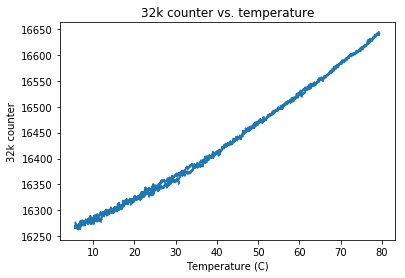

In [3]:
plt.plot(temperature, counts_32k)
plt.title('32k counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('32k counter')
plt.show()

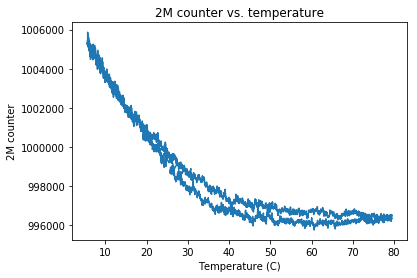

In [4]:
plt.plot(temperature, counts_2M)
plt.title('2M counter vs. temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('2M counter')
plt.show()

Slope: -38.991718841821765 Intercept: 2411.166265062145


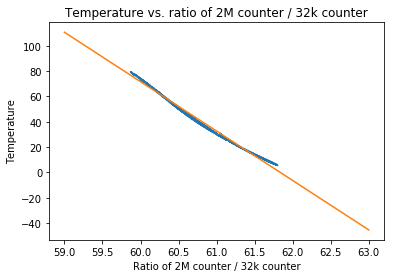

In [5]:
ratios_2M_32k = counts_2M / counts_32k
slope_ratio, intercept_ratio = scipy.stats.linregress(ratios_2M_32k, temperature)[:2]
print('Slope:', slope_ratio, 'Intercept:', intercept_ratio)

x = np.arange(59, 64)
plt.plot(ratios_2M_32k, temperature)
plt.plot(x, slope_ratio * x + intercept_ratio)
plt.title('Temperature vs. ratio of 2M counter / 32k counter')
plt.xlabel('Ratio of 2M counter / 32k counter')
plt.ylabel('Temperature')
plt.show()

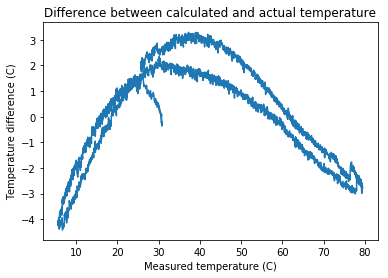

In [6]:
diff = slope_ratio * ratios_2M_32k + intercept_ratio - temperature

plt.plot(temperature, diff)
plt.title('Difference between calculated and actual temperature')
plt.xlabel('Measured temperature (C)')
plt.ylabel('Temperature difference (C)')
plt.show()